In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

View UMAP results for baseline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tfumap.paths import MODEL_DIR
from tfumap.semisupervised_keras import pretrained_networks

In [4]:
datasets = ["cifar10"]
aug_types = [
    "augmented",
    "not_augmented",
    "umap_augmented",
    "umap_not_augmented",
    "umap_not_augmented_thresh",
    "umap_euclidean_augmented_no_thresh",
    "umap_not_augmented_linear_thresh"
]
dset_sizes = [4, 16, 64, 256, 1024, "full"]

In [5]:
results_loc = MODEL_DIR / 'semisupervised-keras' 

In [6]:
results_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'augmented', 'timestamp', 'location', 'test_acc', 'dset_size_title'])
for dataset in datasets:

    for aug_type in aug_types:
        for dset_size in dset_sizes:
                
            dset_timestamp = pretrained_networks[dataset][aug_type][dset_size]
            dset_loc = results_loc / dataset/ str(dset_size) / dset_timestamp
            loc_list = list(dset_loc.glob('test_loss.npy'))
            if dset_size == 'full':
                if aug_type == 'augmented':
                    print(loc_list)
                    print(aug_type)
            if len(loc_list) == 0:
                print(aug_type, dset_size, dataset, dset_loc)
                continue
            test_loss, test_acc = np.load(loc_list[0])
            dset_size_title = str(dset_size)
            dset_size = str(dset_size) if dset_size is not 'full' else 4096
            results_df.loc[len(results_df)] = [
                dataset, dset_size, aug_type, dset_timestamp, dset_loc, test_acc, dset_size_title
            ]
            

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/cifar10/full/cifar10_full____2020_08_11_19_25_33_543821_baseline_augmented/test_loss.npy')]
augmented


In [7]:
dset_loc

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/cifar10/full/cifar10_0.8_full____2020_08_22_22_49_37_683086_umap_augmented')

In [8]:
loc_list

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/cifar10/full/cifar10_0.8_full____2020_08_22_22_49_37_683086_umap_augmented/test_loss.npy')]

In [9]:
!ls /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/cifar10/full/cifar10_full____2020_08_11_19_25_33_543821_baseline_augmented

checkpoint			full_model.data-00000-of-00001
classifier.data-00000-of-00001	full_model.index
classifier.index		history.pickle
encoder.data-00000-of-00001	test_loss.npy
encoder.index			train_embedding.npy


In [10]:
!ls /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/cifar10/full/cifar10_full____2020_08_11_19_25_33_543821_baseline_augmented/

checkpoint			full_model.data-00000-of-00001
classifier.data-00000-of-00001	full_model.index
classifier.index		history.pickle
encoder.data-00000-of-00001	test_loss.npy
encoder.index			train_embedding.npy


In [11]:
results_df

,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title
0,cifar10,4,augmented,cifar10_4____2020_08_11_19_25_58_939055_baseli...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.2814,4
1,cifar10,16,augmented,cifar10_16____2020_08_11_19_25_49_190428_basel...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.4042,16
2,cifar10,64,augmented,cifar10_64____2020_08_11_19_25_41_266466_basel...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.5993,64
3,cifar10,256,augmented,cifar10_256____2020_08_11_19_25_33_546350_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7664,256
4,cifar10,1024,augmented,cifar10_1024____2020_08_11_19_25_33_541963_bas...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8667,1024
5,cifar10,4096,augmented,cifar10_full____2020_08_11_19_25_33_543821_bas...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9332,full
6,cifar10,4,not_augmented,cifar10_4____2020_08_17_16_02_48_330135_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.2170,4
7,cifar10,16,not_augmented,cifar10_16____2020_08_17_15_08_23_820108_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.3019,16
8,cifar10,64,not_augmented,cifar10_64____2020_08_17_15_08_38_407886_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.4992,64
9,cifar10,256,not_augmented,cifar10_256____2020_08_17_22_16_16_108071_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7220,256


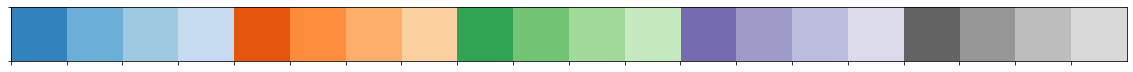

In [12]:
pal = sns.color_palette('tab20c',20)
sns.palplot(pal)

In [14]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Augmented"
    },
    {
        "mask": results_df.augmented == 'umap_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_not_augmented',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented_no_thresh',
        "color": pal[8],
        "ls": 'dashed',
        "marker": 'o',
        "label": "+ UMAP (euclidean)"
    },
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented_no_thresh',
        "color": pal[8],
        "ls": 'dashed',
        "marker": 'o',
        "label": "+ UMAP (euclidean)"
    }
]

In [15]:
subset_baseline_augmented_mask = results_df.augmented == 'augmented'
subset_baseline_augmented_color = pal[16] #pal[0]
subset_baseline_augmented_ls = 'dashed'
subset_baseline_augmented_marker = 'X'
subset_baseline_augmented_label = '+ Augmented'

In [16]:
subset_baseline_notaugmented_mask = results_df.augmented == 'not_augmented'
subset_baseline_notaugmented_color = pal[16] #pal[4]
subset_baseline_notaugmented_ls = 'solid'
subset_baseline_notaugmented_marker = 'o'
subset_baseline_notaugmented_label = 'Baseline'

In [17]:
subset_baseline_umapaugmented_mask = results_df.augmented == 'umap_augmented'
subset_baseline_umapaugmented_color = pal[0]
subset_baseline_umapaugmented_ls = 'dashed'
subset_baseline_umapaugmented_marker = 'X'
subset_baseline_umapaugmented_label = '+ Aug. + UMAP (learned)'

In [18]:
subset_baseline_umapnotaugmented_mask = results_df.augmented == 'umap_not_augmented'
subset_baseline_umapnotaugmented_color = pal[0]
subset_baseline_umapnotaugmented_ls = 'solid'
subset_baseline_umapnotaugmented_marker = 'o'
subset_baseline_umapnotaugmented_label = '+ UMAP (learned)'

In [19]:
subset_baseline_umapnotaugmentedthresh_mask = results_df.augmented == 'umap_not_augmented_thresh'
subset_baseline_umapnotaugmentedthresh_color = pal[4]
subset_baseline_umapnotaugmentedthresh_ls = 'solid'
subset_baseline_umapnotaugmentedthresh_marker = 'o'
subset_baseline_umapnotaugmentedthresh_label = '+ UMAP (learned, thresh)'

In [20]:
subset_eucumap_aug_mask = results_df.augmented == 'umap_euclidean_augmented_no_thresh'
subset_eucumap_aug_color = pal[8]
subset_eucumap_aug_ls = 'solid'
subset_eucumap_aug_marker = 'o'
subset_baseline_umapnotaugmentedthresh_label = '+ UMAP (learned, thresh)'

In [21]:
from IPython.display import display

In [22]:
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [23]:
plot_list = [
    (
        subset_baseline_notaugmented_mask,
        subset_baseline_notaugmented_color,
        subset_baseline_notaugmented_ls,
        subset_baseline_notaugmented_label,
        subset_baseline_notaugmented_marker,
    ),
        (
        subset_baseline_umapnotaugmented_mask,
        subset_baseline_umapnotaugmented_color,
        subset_baseline_umapnotaugmented_ls,
        subset_baseline_umapnotaugmented_label,
        subset_baseline_umapnotaugmented_marker,
    ),
    (
        subset_baseline_augmented_mask,
        subset_baseline_augmented_color,
        subset_baseline_augmented_ls,
        subset_baseline_augmented_label,
        subset_baseline_augmented_marker,
    ),

    (
        subset_baseline_umapaugmented_mask,
        subset_baseline_umapaugmented_color,
        subset_baseline_umapaugmented_ls,
        subset_baseline_umapaugmented_label,
        subset_baseline_umapaugmented_marker,
    ),
    (
        subset_baseline_umapnotaugmentedthresh_mask,
        subset_baseline_umapnotaugmentedthresh_color,
        subset_baseline_umapnotaugmentedthresh_ls,
        subset_baseline_umapnotaugmentedthresh_label,
        subset_baseline_umapnotaugmentedthresh_marker,
    ),
    (
        subset_baseline_umapnotaugmentedthresh_mask,
        subset_baseline_umapnotaugmentedthresh_color,
        subset_baseline_umapnotaugmentedthresh_ls,
        subset_baseline_umapnotaugmentedthresh_label,
        subset_baseline_umapnotaugmentedthresh_marker,
    ),
    
]

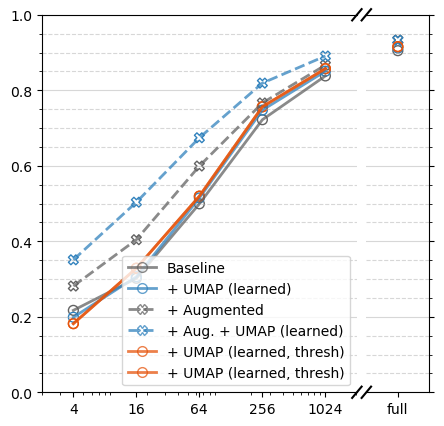

In [24]:
alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for (mask, color, ls, label, marker) in plot_list:
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax2.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

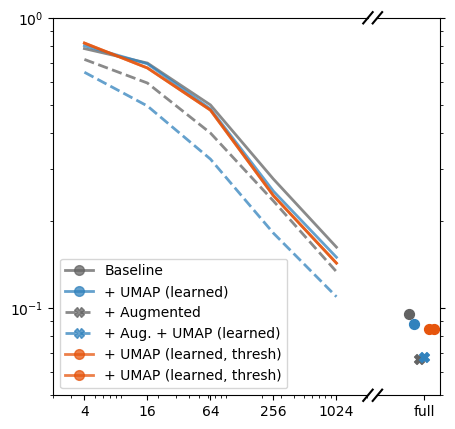

In [25]:
alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, (mask, color, ls, label, marker) in enumerate(plot_list):

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    #ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(plot_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if True:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')

In [26]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_not_augmented',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_not_augmented_thresh',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned, thresh)"
    },
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented_no_thresh',
        "color": pal[8],
        "ls": 'dashed',
        "marker": 'o',
        "label": "+ Aug. + UMAP (euclidean)"
    }
]

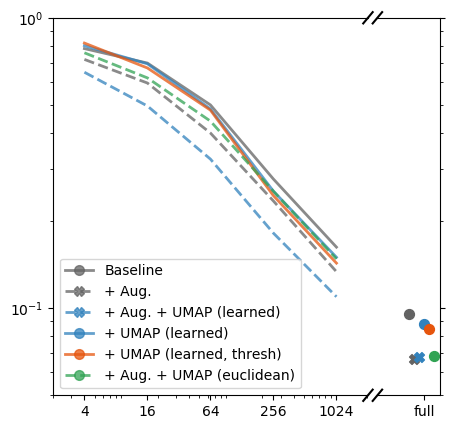

In [27]:
alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    #ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(plot_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if True:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')

Text(0.5, 0, '# Training Examples')

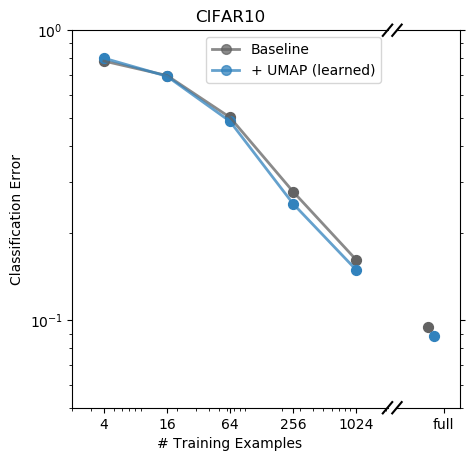

In [35]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_not_augmented',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },

    
]

alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(plot_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if True:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
ax.set_title('CIFAR10')
ax.set_ylabel('Classification Error')
ax.set_xlabel('# Training Examples')

Text(0.5, 1.0, 'CIFAR10')

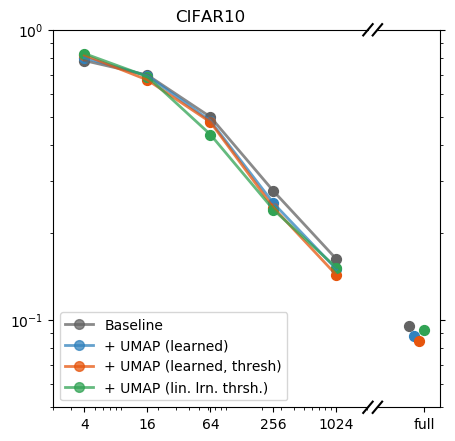

In [36]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_not_augmented',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_not_augmented_thresh',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned, thresh)"
    },
    {
        "mask": results_df.augmented == 'umap_not_augmented_linear_thresh',
        "color": pal[8],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (lin. lrn. thrsh.)"
    },
    
]

alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(plot_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if True:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
ax.set_title('CIFAR10')

Text(0.5, 1.0, 'CIFAR10')

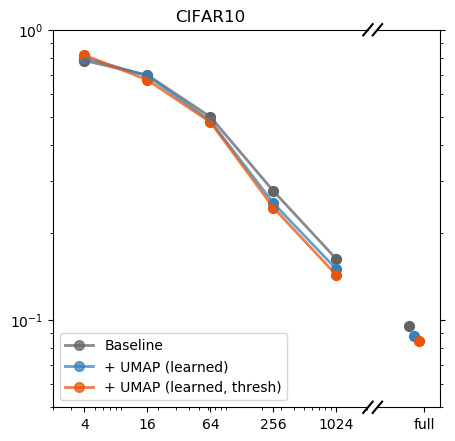

In [37]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_not_augmented',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_not_augmented_thresh',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned, thresh)"
    },
    
]

alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(plot_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if True:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
ax.set_title('CIFAR10')

Text(0.5, 0, '# Training Examples')

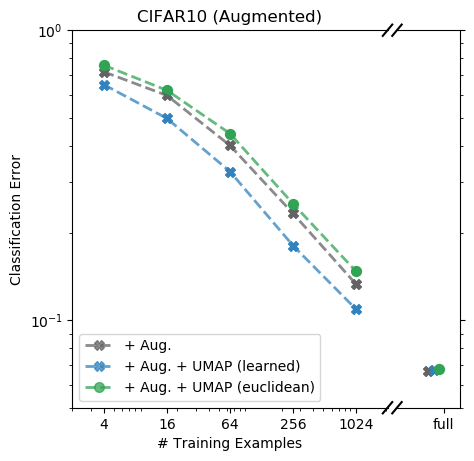

In [30]:
color_list = [

    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (learned)"
    },


    {
        "mask": results_df.augmented == 'umap_euclidean_augmented_no_thresh',
        "color": pal[8],
        "ls": 'dashed',
        "marker": 'o',
        "label": "+ Aug. + UMAP (euclidean)"
    }
]

alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(plot_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if True:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
ax.set_title('CIFAR10 (Augmented)')
ax.set_ylabel('Classification Error')
ax.set_xlabel('# Training Examples')